# Ford GoBike Data Exploration
## Preliminary Wrangling

This document explores a dataset containing information and attributes for approximately 180,000 entry.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe, print first 5 entries to gain general insight to the dataset
df=pd.read_csv('./201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### Drop any rows with NA entries

In [3]:
df.dropna(inplace=True)

In [4]:
# high-level overview of the schema and composition of this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [5]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

There are 180,000 trip data gatherd in febraury 2019 in the dataset with 10 features (duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip). Most variables are numeric in nature.



### What is/are the main feature(s) of interest in your dataset?

I'm interested in the **`start_time`**,**`end_time`** for time series analysis, as well as **`gender`**, **`birth_year`**,**`latitude`** and **`longitude`** related features.   

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect the **`start_time`**,**`end_time`** and **`duration_sec`** compared against other categorical features such as **`gender`** and **`birth_year`** will provide some useful insight

## Univariate Exploration

I'll start by looking at the KDE distribution of the variable of interest: duration_sec.


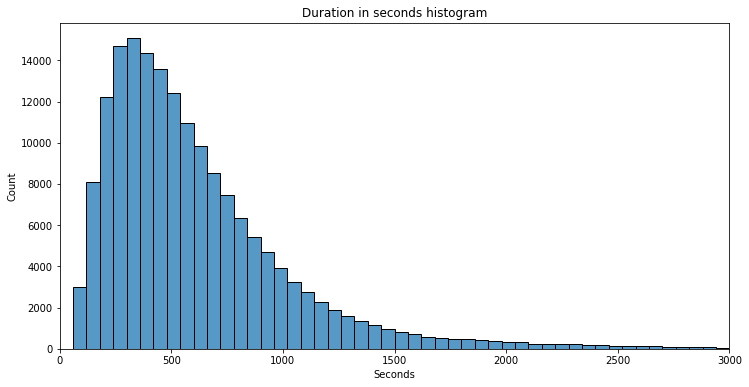

In [6]:
plt.figure(figsize=(12,6))
plt.title('Duration in seconds histogram')
plt.xlabel('Seconds')
plt.xlim((0,3000));
sb.histplot(data=df,x='duration_sec',bins=np.arange(0,3060,60));

Since we want to do Time Series Analysis for our dataset it is convenient to convert columns like **`start_time`** to a predifined type by pandas which is recognized as a datetime dtype column instead of a string dtype column.

In [7]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_day']=df['start_time'].dt.dayofweek
df['start_hour']=df['start_time'].dt.hour

What is the distribution of the **'member_birth_year'** feature?

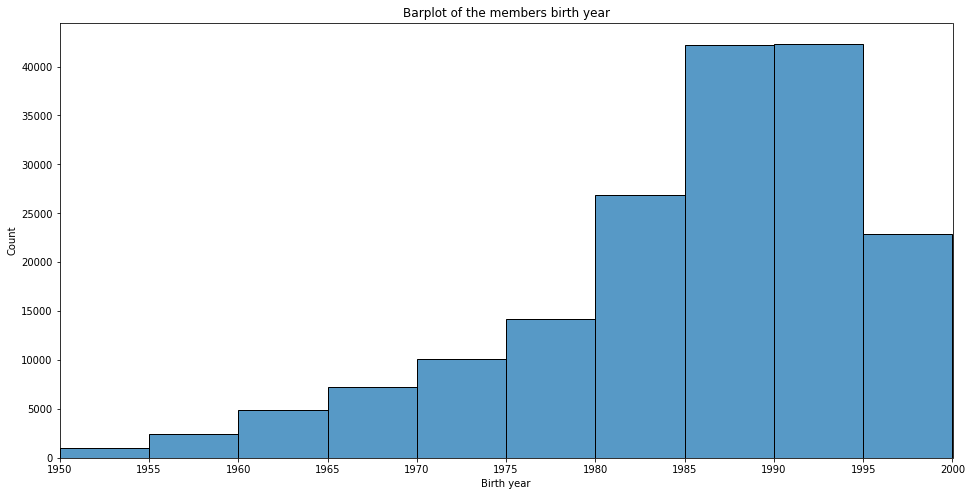

In [8]:
plt.figure(figsize=(16,8));
sb.histplot(data=df,x='member_birth_year',bins=np.arange(1950,2005,5))
plt.xticks(np.arange(1950,2005,5))
plt.xlabel('Birth year')
plt.title('Barplot of the members birth year');
plt.xlim((1950,2000));

The majority of the users are born between 1985 and 1995.

What is the distrubution for renting bikes duration in minutes for genders,for different types of users, is there any significant differences?

1. Create a new feature "duration_min" which is the time delta for renting bikes for each entry in minutes.

In [9]:
df['duration_min']=df['duration_sec']/60

2. Plot the histogram of the genders in the dataframe.

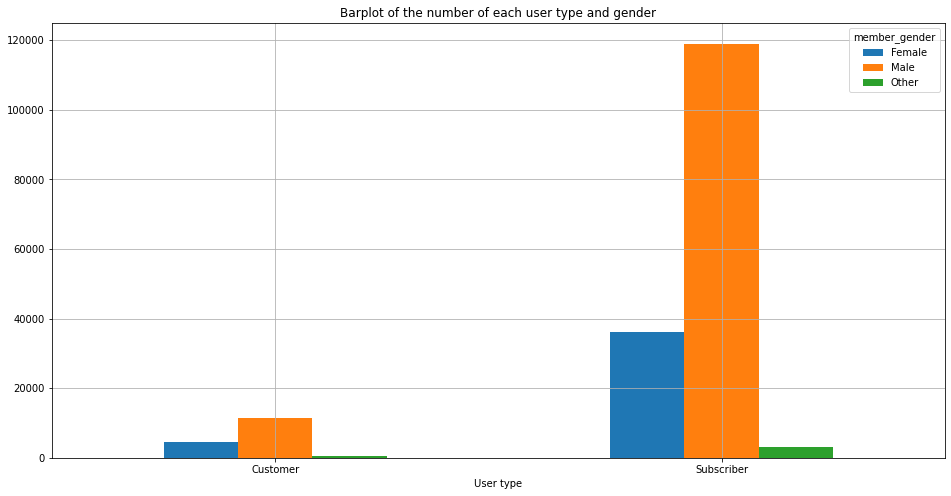

In [10]:
#df.groupby('member_gender')['member_gender'].count().plot(kind='hist')

df.groupby(['member_gender','user_type'])['member_gender'].count()
df.groupby('member_gender').user_type.value_counts().unstack(0).plot(kind='bar',figsize=(16,8))
plt.title('Barplot of the number of each user type and gender')
plt.xlabel('User type')
plt.grid()
plt.xticks(rotation=0);

This service appeals more to male members, with a huge margin compared to female members.

3. see the relationship for duration in minutes for different types of users, for different genders using a faceted grid plot

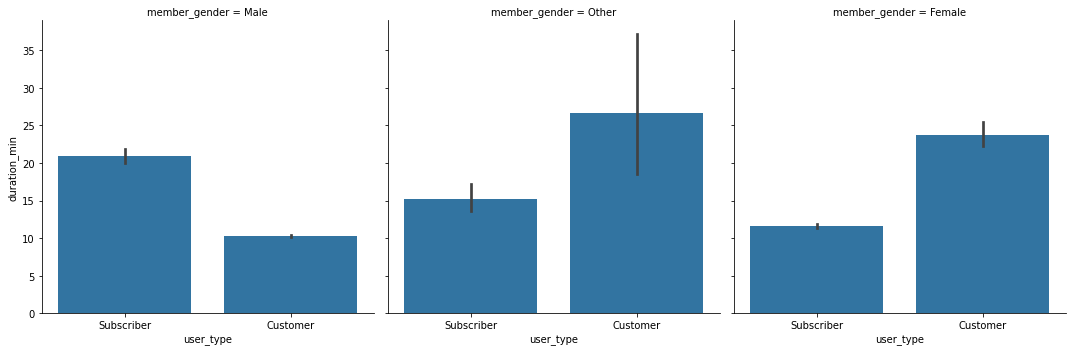

In [11]:
g = sb.FacetGrid(data = df, col = 'member_gender', height=5);
g.map(sb.barplot, 'user_type', 'duration_min');

males tend rent bikes longer when they are subscribers, females and others go against this trend.

what is the distrubution of the service members according to thier birth year and gender?

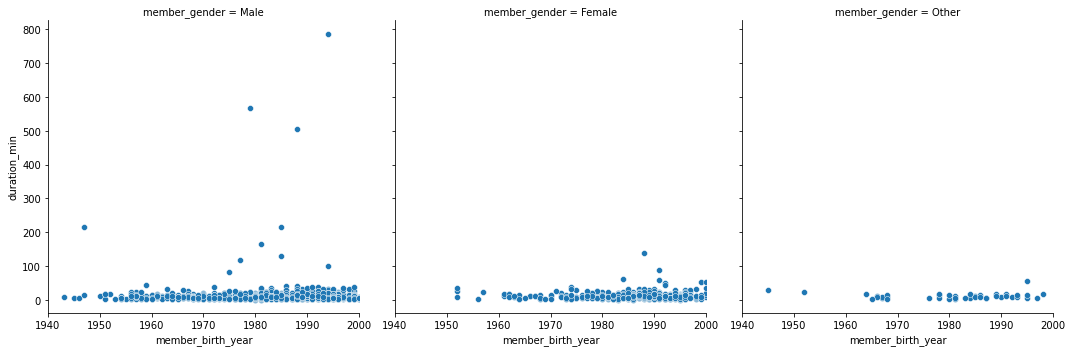

In [12]:
df_place_holder=df.sample(frac=0.01)
g = sb.FacetGrid(data = df_place_holder, col = 'member_gender', height=5,subplot_kws={'alpha': 0.1});
plt.xlim((1940,2000))
g.map(sb.scatterplot, 'member_birth_year', 'duration_min');

As we can see above, there is a postive tendancy for longer duration of renting if the user is born near the 2000s

How often do member use this service across different days of the week?

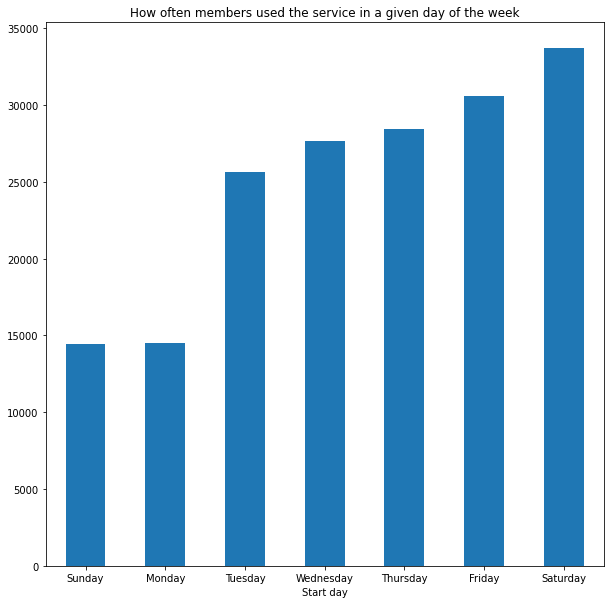

In [13]:
plt.figure(figsize=(10,10))
df['start_day'].value_counts(ascending=True).plot(kind='bar')
plt.xlabel('Start day')
plt.title('How often members used the service in a given day of the week');
plt.xticks(np.arange(0,7,1),['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],rotation=0);


We can deduce that the number of users in each day of the week is similar, not correlated positively or negatively to weekly vacations "monday".

which hours are the busiest during the day?

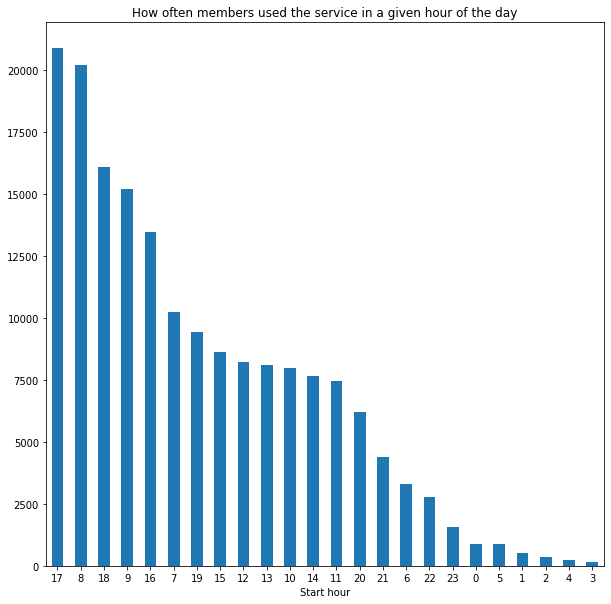

In [14]:
plt.figure(figsize=(10,10))
df['start_hour'].value_counts(ascending=False).plot(kind='bar')
plt.xticks(rotation=0);
plt.xlabel('Start hour');
plt.title('How often members used the service in a given hour of the day');

It's clear that most members use this service early in the morning 8am, and 6-7pm usually when they complete their 9 to 5 work shift.

What is the total distance distribution for different days of the week. 

1. Since we don't directly have a feature with the total distance, a feature **'disp_meters'** will be created, the following values will help to convert later.

In [15]:
LATITUDE_TO_METERS=111151.29 # taken from http://www.csgnetwork.com/degreelenllavcalc.html
LONGITUDE_TO_METERS=111302.62 #  http://www.csgnetwork.com/degreelenllavcalc.html

2. Calculate the difference in longitude and latitude from the corresponding features.

In [16]:
df['disp_latitude']=abs(df['start_station_latitude']-df['end_station_latitude'])
df['disp_longitude']=abs(df['start_station_longitude']-df['end_station_longitude'])

3. Calculate the euclidean distance after acquiring the difference features.

In [17]:
df['disp_meters']=abs(((df['disp_longitude']*LONGITUDE_TO_METERS)**2-(df['disp_latitude']*LATITUDE_TO_METERS)**2))**0.5

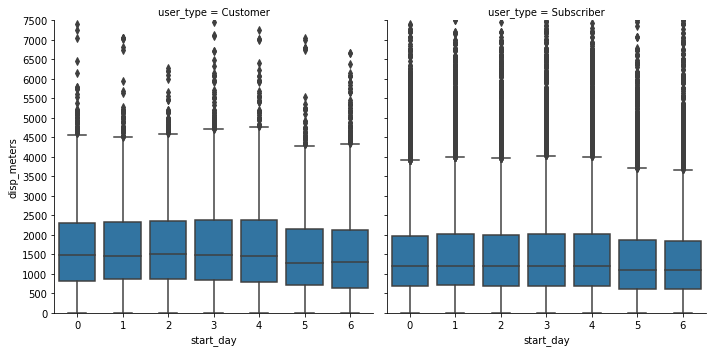

In [18]:
g = sb.FacetGrid(data = df, col = 'user_type', height=5);
plt.yticks(np.arange(0,8000,500));
plt.ylim((0,7500));
plt.title('Total distance of the trips for customers and members in each day of the week');
g.map(sb.boxplot, 'start_day', 'disp_meters');

Majority of our users have trips with a total distance of 500m and 2000m.

To have a more general and clear view of the distrubution of the total distance parameter.

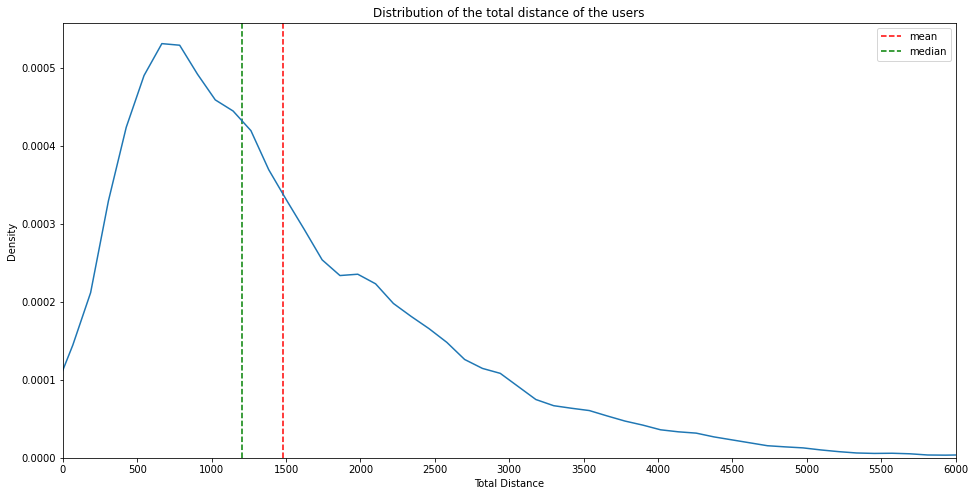

In [19]:
plt.figure(figsize=(16,8))
plt.xlim((0,6000))
#plt.text(x=0,y=0,s='mean={}'.format(round(df['disp_meters'].mean())))
plt.axvline(x=df['disp_meters'].mean(),color='red',linestyle='--',label='mean')
plt.axvline(x=df['disp_meters'].median(),color='green',linestyle='--',label='median')
plt.title('Distribution of the total distance of the users')
plt.xlabel('Total Distance');
plt.xticks(np.arange(0,6500,500))
plt.legend();
sb.kdeplot(data=df,x='disp_meters');

Most users tend to travel at most 2000 meters usually, so short trips are preferred for the users of this service.